Please input bulk modulus of matrix: 16.7
Please input bulk modulus of aggregate: 34
Please input Elastic module of matrix: 10
Please input Elastic module of aggregate: 76


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


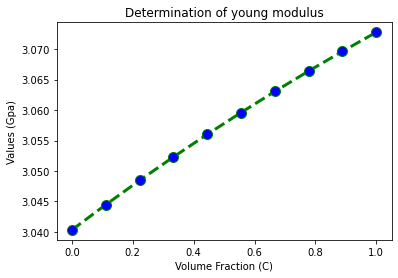

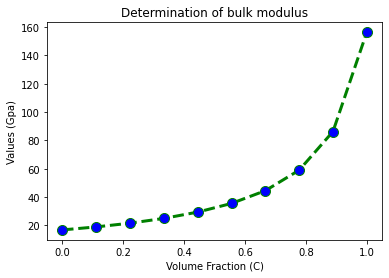

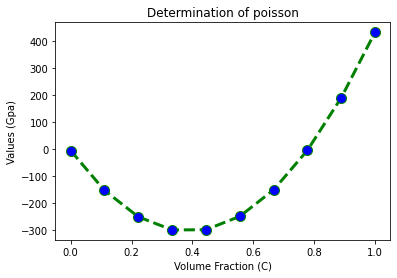

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


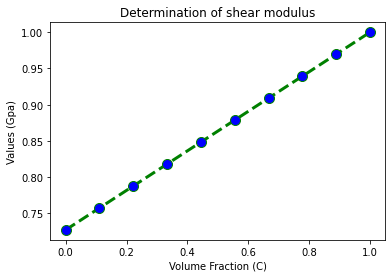

Please enter the volume fraction: 0.5
The Bulk modulus values at 0.5 are 32.35984143265871
The poisson values at 0.5 are -273.5344057557112
The shear modulus values at 0.5 are (0.8636046430640492+0.3472624375863971j)
The Young modulus values at 0.5 are (3.057799255110111+1.9730499477927255j)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def compositesphere(c2,k1,k2,Gm,Gi):
    #% This function is for composite sphere model
    #% E= Young's modulus, K= Bulk Modulus, G= Shear Modulus,
    #%c2= aggregate volume fraction, E1= elastic modulus formatrix, E2= elastic
    #%modulus for inclusion, k1= bulk modulus for matrix, k2=bulk modulus for
    #%inclusions
    v1 = 0.5-(E1/6*k1)
    v2= 0.5-(E2/6*k2) # Poissons ratio;
    c1=1-c2
    #%% Variables determinations
    n_1=(49-50*v2*v1)*((Gi/Gm)-1)+35*(Gi/Gm)*(v2-2*v1)+35*(2*v2-v1)
    n_2= 5*v2*((Gi/Gm)-8)+7*((Gi/Gm)+4)
    n_3=(Gi/Gm)*(8-10*v1)+(7-5*v1)
    A= 8*((Gi/Gm)-1)*(4-5*v1)*n_1*c2**(10/3)-2*(63*((Gi/Gm)-1)*n_2+2*n_1*n_2)*c2**(7/3)+ 252*((Gi/Gm)-1)*n_2*c2**(5/3)-50*((Gi/Gm)-1)*(7-12*v1+8*v1**2)*n_2*c2 +(4*(7-10*v1)*n_2*n_3)
    B=-2*((Gi/Gm)-1)*(1-5*v1)*n_1*c2**(10/3)+2*(63*((Gi/Gm)-1)*n_2+2*n_1*n_2)*c2**(7/3)- 252*((Gi/Gm)-1)*n_2*c2**(5/3)+75*((Gi/Gm)-1)*(3-v1)*c2*n_2*v1+(3/2)*(15*v1-7)*n_2*n_3
    C= 4*((Gi/Gm)-1)*(5*v1-7)*n_1*c2**(10/3)-2*(63*((Gi/Gm)-1)*n_2+2*n_1*n_2)*c2**(7/3)+ 252*((Gi/Gm)-1)*n_2*c2**(5/3)+25*((Gi/Gm)-1)*(v1**2-7)*c2*n_2-(7+5*v1)*n_2*n_3
    #%%
    #% A*(G/G1)^2+2*B*(G/G1)+C =0; % the quadetric equation for solving;
    p=[A*(1/Gm)**2,2*B*(1/Gm),C*1]
    p = np.squeeze(p)
    p = np.concatenate(p)
    G = max(np.roots(p))
    #%% Bulk modulus determination
    K = k1 + ((c2*(k2-k1))/(1+(1-c1)*((k2-k1)/(k1+((4/3)*v1)))))
    #%% Young Modulus determination
    E = (9*G*K)/(G+3*K)
    #%% Shear Modulus
    U = 1-((1-G)*(7-(5*v1)+(2*(4-(5*v1))*G))/(15*(1-v1)))*c1
    #%% poisson modulus
    V = 1 - (c2*v2)+(((1-c2)*v1)+(c2*(1-c2)*(v2-v1)*((k1+3))))/(1+(c2/k1+(3)))
    return E,K,V,U

k1= float(input('Please input bulk modulus of matrix: '))#20.8 #GPa; % bulk modulus of matrix
k2= float(input('Please input bulk modulus of aggregate: '))#44 #GPa; % bulk modulus of aggregate
E1 = float(input('Please input Elastic module of matrix: '))#28.7 #GPa; % Elastic module of matrix
E2 = float(input('Please input Elastic module of aggregate: '))#86.7 #GPa; % Elastic module of aggregate
c2 = np.linspace(0,1,10) # aggregate volume fraction
Gm= E1/(2*(1+k1)) # GPa; effectiveshear modulus of matrix
Gi= E2/(2*(1+k2)) # GPa; effective shear molus of aggregate

E,K,V,U = compositesphere(c2,k1,k2,Gm,Gi)

plt.plot(c2,E,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Determination of young modulus')
plt.ylabel('Values (Gpa)')
plt.xlabel('Volume Fraction (C)')
plt.show()
plt.plot(c2,K,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Determination of bulk modulus')
plt.ylabel('Values (Gpa)')
plt.xlabel('Volume Fraction (C)')
plt.show()
plt.plot(c2,V,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Determination of poisson')
plt.ylabel('Values (Gpa)')
plt.xlabel('Volume Fraction (C)')
plt.show()
plt.plot(c2,U,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Determination of shear modulus')
plt.ylabel('Values (Gpa)')
plt.xlabel('Volume Fraction (C)')
plt.show()

#get values form volume fraction
volfrac = float(input('Please enter the volume fraction: '))
a = np.interp(volfrac, c2,K) #change 0.29 for change the number of volume fraction
b = np.interp(volfrac, c2,V)
c = np.interp(volfrac, c2,U)
d = np.interp(volfrac, c2,E)
print('The Bulk modulus values at ' + str(volfrac) + ' are ' + str(a))
print('The poisson values at ' + str(volfrac) + ' are ' + str(b))
print('The shear modulus values at ' + str(volfrac) + ' are ' + str(c))
print('The Young modulus values at ' + str(volfrac) + ' are ' + str(d))